### We demonstrate the use of NeuralStyleTransfer class to perform neural style transfer

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import time
import os
import tensorflow as tf
from utils import *
from NeuralStyleTransfer import *
from train import *

### Creating neural style transfer object

We need path for content image and the style image for creating hte neural style transfer object

In [2]:
content_path = os.path.join(os.getcwd(), 'data/content/content_image.JPG')
style_path = os.path.join(os.getcwd(), 'data/styles/monet_style_landscape.jpg')
ntf = NeuralStyleTransfer(content_path, style_path)

Extracting image style and content
Using vgg19 model
Style layers:  ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
Content layers:  ['block5_conv2']


We use VGG19 as the default pre-trained model, we can change the underlying pre-trained model as well. We have two options currently viz. VGG19 and VGG16

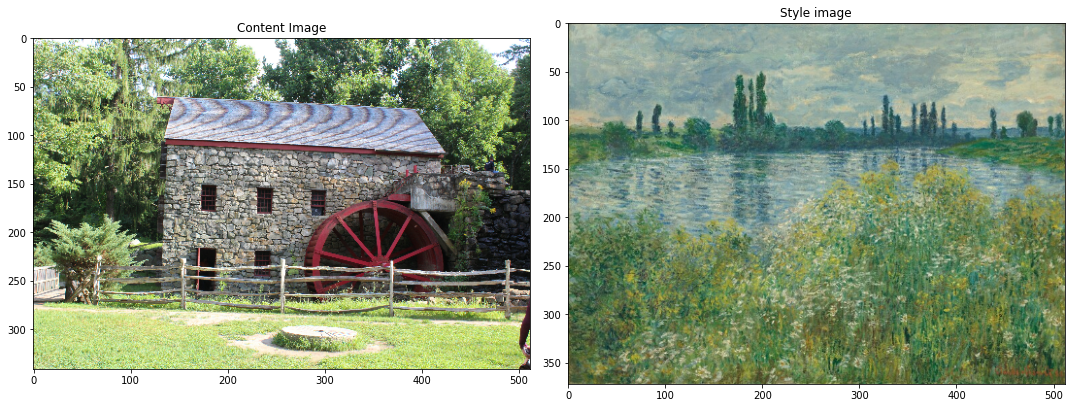

In [3]:
ntf.plot_images(figure_size=(15,20))

We see the content image and style image used in this example. We use Monet style landscape as the style image.

### Obtaining the stylized image
We next initialize the generated image with the content image

In [4]:
image = tf.Variable(ntf.content_image)

We generate the styled image using the train function, we need to pass the image, NeuralStyleTransfer object, weights for content loss, style loss and total variation loss. We also need to pass the number of epochs for training.

In [5]:
final_img = train(image, ntf, wt_content = 10., wt_style=40., wt_variation=10., epochs = 100)

Epoch 1 completed, time taken (s) = 0.77
Epoch 2 completed, time taken (s) = 0.03
Epoch 3 completed, time taken (s) = 0.09
Epoch 4 completed, time taken (s) = 0.20
Epoch 5 completed, time taken (s) = 0.20
Epoch 6 completed, time taken (s) = 0.20
Epoch 7 completed, time taken (s) = 0.21
Epoch 8 completed, time taken (s) = 0.20
Epoch 9 completed, time taken (s) = 0.20
Epoch 10 completed, time taken (s) = 0.20
Epoch 11 completed, time taken (s) = 0.20
Epoch 12 completed, time taken (s) = 0.20
Epoch 13 completed, time taken (s) = 0.20
Epoch 14 completed, time taken (s) = 0.20
Epoch 15 completed, time taken (s) = 0.20
Epoch 16 completed, time taken (s) = 0.20
Epoch 17 completed, time taken (s) = 0.20
Epoch 18 completed, time taken (s) = 0.20
Epoch 19 completed, time taken (s) = 0.20
Epoch 20 completed, time taken (s) = 0.20
Epoch 21 completed, time taken (s) = 0.20
Epoch 22 completed, time taken (s) = 0.20
Epoch 23 completed, time taken (s) = 0.20
Epoch 24 completed, time taken (s) = 0.20
E

### Final stylized image after training

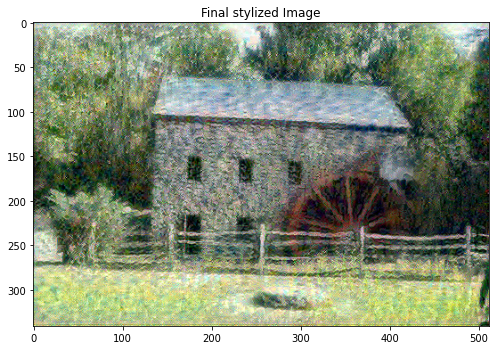

In [6]:
plt.figure(figsize=(7,10))
plt.imshow(final_img[0])
plt.title('Final stylized Image')
plt.tight_layout()
plt.show()

### Lets re-run the model using a different optimizer

In [7]:
ntf.set_optimizer('RMSProp', learning_rate =2e-2)

Using RMSProp optimizer with learning rate 0.0200


In [8]:
image = tf.Variable(ntf.content_image)
final_img = train(image, ntf, wt_content = 10., wt_style=40., wt_variation=10., epochs = 100)

Epoch 1 completed, time taken (s) = 0.21
Epoch 2 completed, time taken (s) = 0.13
Epoch 3 completed, time taken (s) = 0.04
Epoch 4 completed, time taken (s) = 0.21
Epoch 5 completed, time taken (s) = 0.21
Epoch 6 completed, time taken (s) = 0.21
Epoch 7 completed, time taken (s) = 0.21
Epoch 8 completed, time taken (s) = 0.21
Epoch 9 completed, time taken (s) = 0.21
Epoch 10 completed, time taken (s) = 0.21
Epoch 11 completed, time taken (s) = 0.21
Epoch 12 completed, time taken (s) = 0.21
Epoch 13 completed, time taken (s) = 0.21
Epoch 14 completed, time taken (s) = 0.21
Epoch 15 completed, time taken (s) = 0.21
Epoch 16 completed, time taken (s) = 0.21
Epoch 17 completed, time taken (s) = 0.21
Epoch 18 completed, time taken (s) = 0.21
Epoch 19 completed, time taken (s) = 0.21
Epoch 20 completed, time taken (s) = 0.21
Epoch 21 completed, time taken (s) = 0.21
Epoch 22 completed, time taken (s) = 0.21
Epoch 23 completed, time taken (s) = 0.21
Epoch 24 completed, time taken (s) = 0.21
E

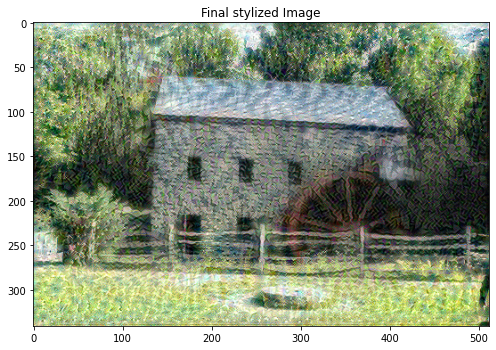

In [9]:
plt.figure(figsize=(7,10))
plt.imshow(final_img[0])
plt.title('Final stylized Image')
plt.tight_layout()
plt.show()